In [ ]:
!pip install contractions

In [ ]:
!pip install wordnet

In [ ]:
pip install --upgrade nltk


In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import contractions
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import string
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

# Word cloud of review text
from wordcloud import WordCloud


# Download necessary resources
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer








[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load the data
data =pd.read_csv('/content/drive/MyDrive/Ecoomerce data/Sentiment2222.csv')



In [ ]:
# Display the first few rows of the DataFrame
print(data.head())



                     id Category                       name  reviews.rating  \
0  AVqkIhwDv8e3D1O-lebb   Tablet   Fire HD 8 Tablet, 16 GB              5.0   
1  AVqkIhwDv8e3D1O-lebb   Tablet   Fire HD 8 Tablet, 16 GB              5.0   
2  AVqkIhwDv8e3D1O-lebb   Tablet   Fire HD 8 Tablet, 16 GB              5.0   
3  AVqkIhwDv8e3D1O-lebb   Tablet   Fire HD 8 Tablet, 16 GB              4.0   
4  AVqkIhwDv8e3D1O-lebb   Tablet   Fire HD 8 Tablet, 16 GB              5.0   

                                                                                                                                                                                              reviews.text  
0                                                          This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.  
1                                                                                                                  

In [ ]:
# Display the last few rows of the DataFrame
print(data.tail())


                         id     Category  \
27895  AVpfl8cLLJeJML43AE3S  Accessories   
27896  AVpfl8cLLJeJML43AE3S  Accessories   
27897  AVpfl8cLLJeJML43AE3S          NaN   
27898                   NaN          NaN   
27899                   NaN          NaN   

                                                                        name  \
27895  Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable\n   
27896  Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable\n   
27897  Kindle Fire Hd 9w Powerfast Adapter Charger + Micro Usb Angle Cable\n   
27898                                                                    NaN   
27899                                                                     \n   

       reviews.rating  \
27895             5.0   
27896             4.0   
27897             3.0   
27898             NaN   
27899             NaN   

                                                                                                       

In [ ]:
# Get the number of rows and columns
print(data.shape)



(27900, 5)


In [ ]:

# Get basic information about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27900 entries, 0 to 27899
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              27897 non-null  object 
 1   Category        27896 non-null  object 
 2   name            27898 non-null  object 
 3   reviews.rating  27897 non-null  float64
 4   reviews.text    27897 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB
None


In [ ]:
# Get summary statistics for numerical columns
print(data.describe())




       reviews.rating
count    27897.000000
mean         4.563286
std          0.744219
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000


In [ ]:
# Check for missing values in the DataFrame
print(data.isnull().sum())


id                3
Category          4
name              2
reviews.rating    3
reviews.text      3
dtype: int64


In [ ]:
# Get the list of column names
print(data.columns)


Index(['id', 'Category', 'name', 'reviews.rating', 'reviews.text'], dtype='object')


In [ ]:
# Count the number of duplicate rows in the DataFrame
num_duplicate_rows = data.duplicated().sum()

In [ ]:
num_duplicate_rows

1

In [ ]:
# Count the occurrences of unique values in a column
print(data['Category'].value_counts())


Tablet            17322
Smart Speakers     3313
e-reader           3176
TV                 2538
e-reader            935
Speaker             318
Charger             243
Accessories          43
Adapter               8
Name: Category, dtype: int64


In [ ]:
# Count of reviews per rating
rating_counts = data['reviews.rating'].value_counts().sort_index()
print(rating_counts)

1.0      326
2.0      339
3.0     1321
4.0     7220
5.0    18691
Name: reviews.rating, dtype: int64


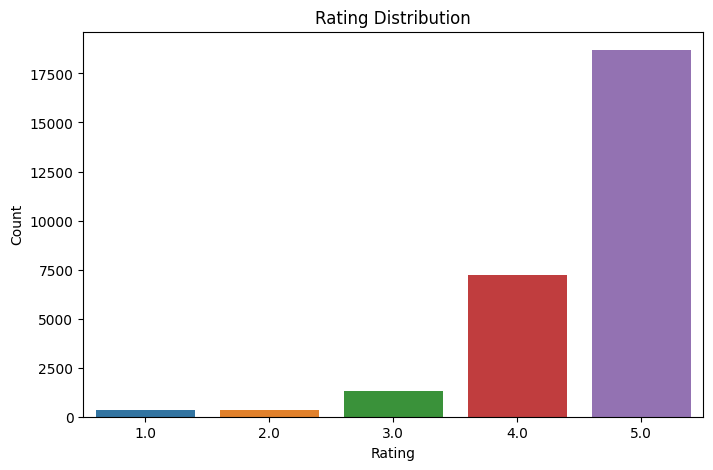

In [ ]:
# Bar plot of rating counts
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


In [ ]:

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

# Define the Lemmatizer
lemmatizer = WordNetLemmatizer()

def cleaner(text):
    """
    Clean and preprocess a given text using various steps.

    This function applies a series of cleaning operations to the input text, including replacing contractions,
    removing hashtags and Twitter handles, eliminating URLs, converting to lowercase, and lemmatizing words.

    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned and preprocessed text.
    """
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

# Preprocessing function
def preprocess_text(text):
    """
    Preprocess a given text for further analysis.

    This function takes the input text, applies the 'cleaner' function, tokenizes the cleaned text,
    removes punctuation and stopwords, and then reconstructs the preprocessed text.

    Args:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text ready for analysis.
    """
    if isinstance(text, str):
        # Apply your cleaner function
        cleaned_text = cleaner(text)

        # Tokenization
        tokens = word_tokenize(cleaned_text)

        # Remove punctuation
        tokens = [token for token in tokens if token not in string.punctuation]

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        # Reconstruct preprocessed text
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        # If the input is not a string, return an empty string
        return ''

# Apply preprocess_text to 'reviews.text' column
data['cleaned_reviews'] = data['reviews.text'].apply(preprocess_text)



In [ ]:
# Function to classify sentiment
def classify_sentiment(score):
    if score['compound'] > 0.6:
        return 'positive'
    elif score['compound'] < 0.1:
        return 'negative'
    else:
        return 'neutral'

In [ ]:


# Calculate sentiment scores using SentimentIntensityAnalyzer
data['sentiment_scores'] = data['cleaned_reviews'].apply(sid.polarity_scores)

# Classify sentiment based on scores
data['sentiment_category'] = data['sentiment_scores'].apply(classify_sentiment)

# Display the results
print(data)


                         id     Category  \
0      AVqkIhwDv8e3D1O-lebb       Tablet   
1      AVqkIhwDv8e3D1O-lebb       Tablet   
2      AVqkIhwDv8e3D1O-lebb       Tablet   
3      AVqkIhwDv8e3D1O-lebb       Tablet   
4      AVqkIhwDv8e3D1O-lebb       Tablet   
...                     ...          ...   
27895  AVpfl8cLLJeJML43AE3S  Accessories   
27896  AVpfl8cLLJeJML43AE3S  Accessories   
27897  AVpfl8cLLJeJML43AE3S          NaN   
27898                   NaN          NaN   
27899                   NaN          NaN   

                                                                        name  \
0                                                   Fire HD 8 Tablet, 16 GB    
1                                                   Fire HD 8 Tablet, 16 GB    
2                                                   Fire HD 8 Tablet, 16 GB    
3                                                   Fire HD 8 Tablet, 16 GB    
4                                                   Fire HD 8 Tablet, 1

In [ ]:
# Filter data by sentiment category
positive_reviews = data[data['sentiment_category'] == 'positive']
negative_reviews = data[data['sentiment_category'] == 'negative']
neutral_reviews = data[data['sentiment_category'] == 'neutral']


In [ ]:

# Combine preprocessed reviews into strings for each sentiment category
positive_text = ' '.join(positive_reviews['cleaned_reviews'])
negative_text = ' '.join(negative_reviews['cleaned_reviews'])
neutral_text = ' '.join(neutral_reviews['cleaned_reviews'])



In [ ]:


# Generate word clouds for each sentiment category
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)


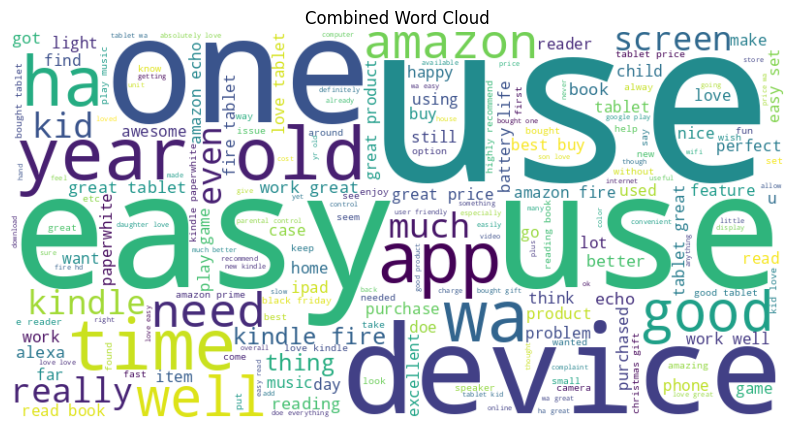

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Merge preprocessed text from each sentiment category
combined_text = ' '.join([
    positive_text,
    negative_text,
    neutral_text
])

# Generate the combined word cloud
wordcloud_combined = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Plot the combined word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_combined, interpolation='bilinear')
plt.axis('off')
plt.title('Combined Word Cloud')

# Apply different color maps for each sentiment
plt.set_cmap("RdYlGn")  # Green for positive, red for negative, yellow for neutral

plt.show()


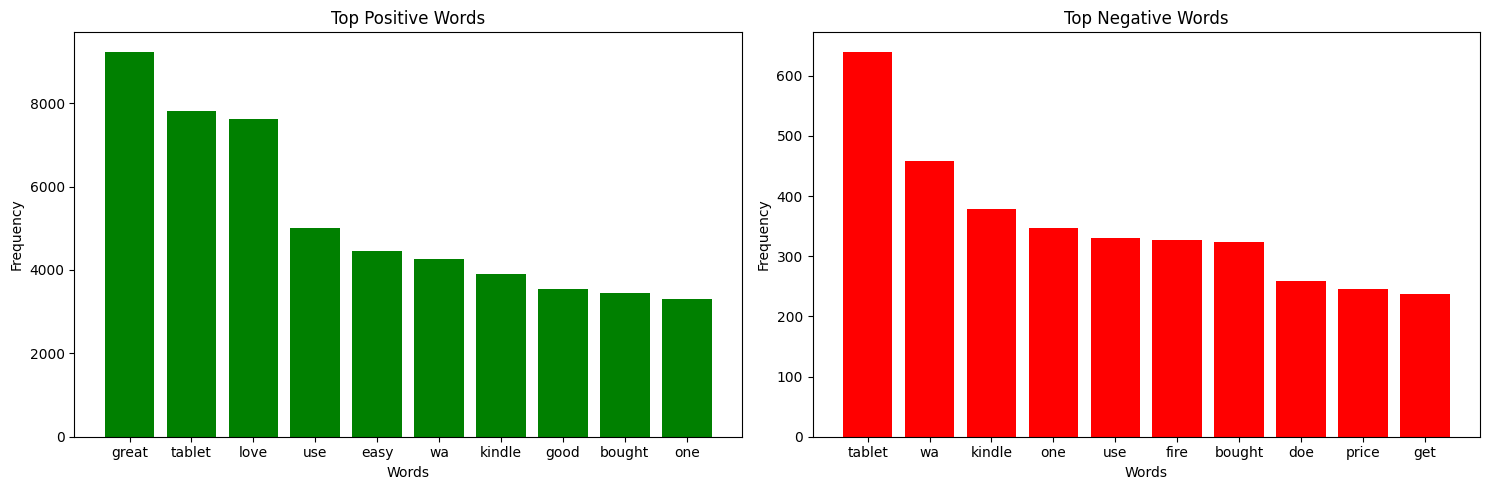

In [ ]:
# Filter data by sentiment category
positive_reviews = data[data['sentiment_category'] == 'positive']
negative_reviews = data[data['sentiment_category'] == 'negative']

# Tokenize and count words for positive and negative reviews
positive_words = ' '.join(positive_reviews['cleaned_reviews']).split()
negative_words = ' '.join(negative_reviews['cleaned_reviews']).split()

# Count word occurrences
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the top N words
top_n = 10
top_positive_words = positive_word_counts.most_common(top_n)
top_negative_words = negative_word_counts.most_common(top_n)

# Create bar charts for top positive and top negative words
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.bar(*zip(*top_positive_words), color='green')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Positive Words')

plt.subplot(122)
plt.bar(*zip(*top_negative_words), color='red')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Negative Words')

plt.tight_layout()
plt.show()


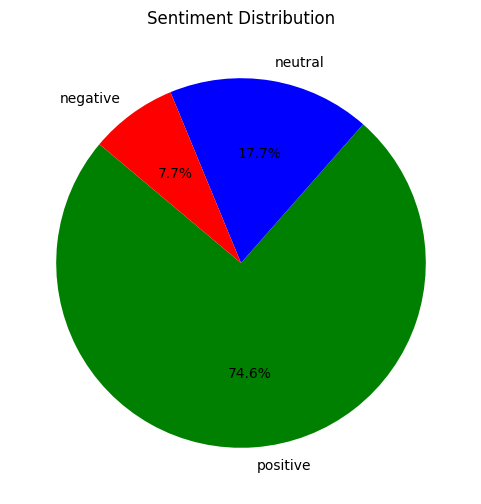

In [ ]:
sentiment_distribution = data['sentiment_category'].value_counts()

# Set colors for the pie chart segments
colors = ['green', 'blue', 'red']  # Green for positive, red for negative, blue for neutral

plt.figure(figsize=(6, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution')

# Display the pie chart
plt.show()


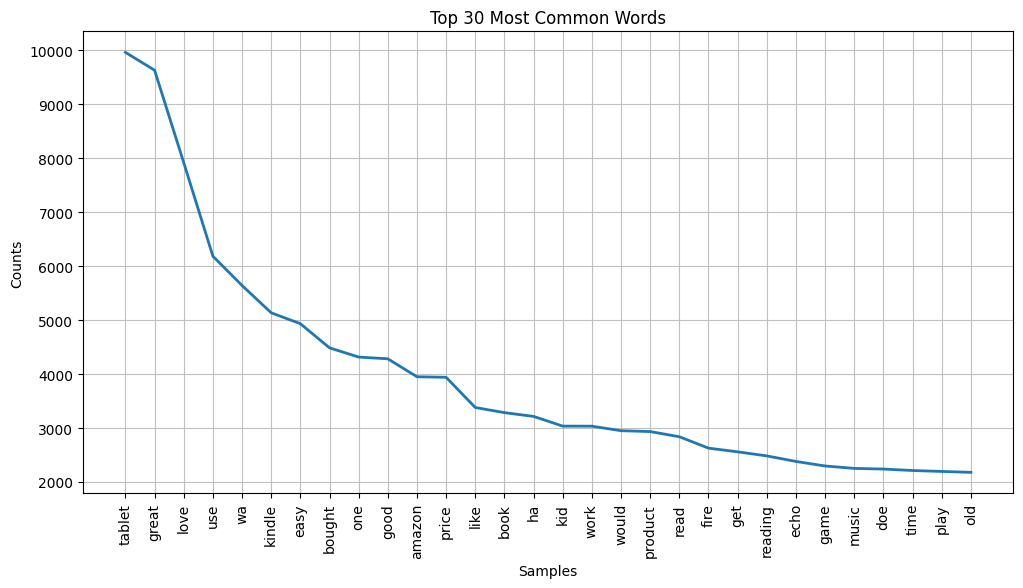

In [ ]:
from nltk import FreqDist

all_words = ' '.join(data['cleaned_reviews']).split()
word_freq = FreqDist(all_words)

plt.figure(figsize=(12, 6))
word_freq.plot(30, title='Top 30 Most Common Words')
plt.show()

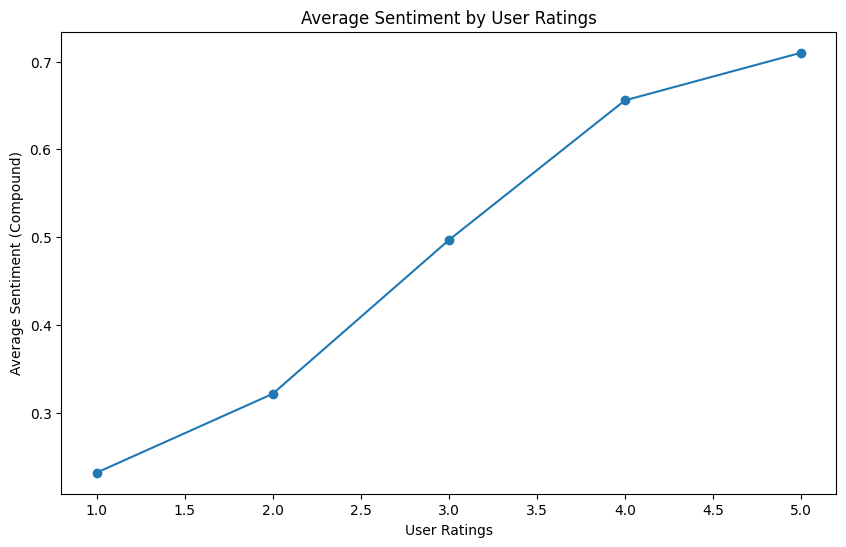

In [ ]:

# Convert sentiment_scores to a DataFrame
sentiment_scores_df = pd.DataFrame(data['sentiment_scores'].tolist())

# Combine sentiment scores with the original data
data = pd.concat([data, sentiment_scores_df], axis=1)

# Calculate the mean compound score by ratings
avg_sentiment_by_rating = data.groupby('reviews.rating')['compound'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_sentiment_by_rating.index, avg_sentiment_by_rating, marker='o')
plt.xlabel('User Ratings')
plt.ylabel('Average Sentiment (Compound)')
plt.title('Average Sentiment by User Ratings')
plt.show()

<Figure size 1000x600 with 0 Axes>

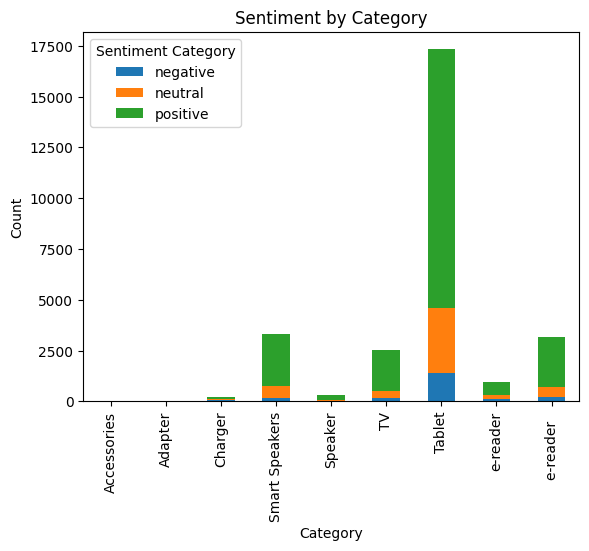

In [ ]:
category_sentiment = data.groupby(['Category', 'sentiment_category']).size().unstack()

plt.figure(figsize=(10, 6))
category_sentiment.plot(kind='bar', stacked=True)
plt.title('Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Sentiment Category')
plt.show()

In [ ]:
!pip install cleantext


In [ ]:
!pip install streamlit -q

In [ ]:
pip install --upgrade streamlit


In [ ]:

%%writefile app.py

import webbrowser


from nltk.sentiment.vader import SentimentIntensityAnalyzer
import streamlit as st
import pandas as pd
import re
import contractions
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import webbrowser

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Define the Lemmatizer
lemmatizer = WordNetLemmatizer()

def cleaner(text):
    """
    Clean and preprocess a given text using various steps.

    This function applies a series of cleaning operations to the input text, including replacing contractions,
    removing hashtags and Twitter handles, eliminating URLs, converting to lowercase, and lemmatizing words.

    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned and preprocessed text.
    """
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

def preprocess_text(text):
    """
    Preprocess a given text for further analysis.

    This function takes the input text, applies the 'cleaner' function, tokenizes the cleaned text,
    removes punctuation and stopwords, and then reconstructs the preprocessed text.

    Args:
        text (str): The input text to be preprocessed.

    Returns:
        str: The preprocessed text ready for analysis.
    """
    if isinstance(text, str):
        # Apply the 'cleaner' function
        cleaned_text = cleaner(text)

        # Tokenization
        tokens = word_tokenize(cleaned_text)

        # Remove punctuation
        tokens = [token for token in tokens if token not in string.punctuation]

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        # Reconstruct preprocessed text
        preprocessed_text = ' '.join(tokens)
        return preprocessed_text
    else:
        # If the input is not a string, return an empty string
        return ''

# Streamlit app header
st.header('Sentiment Analysis')

# Text input for sentiment analysis
text_input = st.text_input('Enter text for sentiment analysis:')

if text_input:
    # Calculate sentiment scores
    sentiment_scores = sid.polarity_scores(text_input)
    polarity = sentiment_scores['compound']

    # Classify sentiment
    if polarity > 0.6:
        sentiment = 'Positive'
        sentiment_text = 'This text is positive!'
    elif polarity < 0.1:
        sentiment = 'Negative'
        sentiment_text = 'This text is negative.'
    else:
        sentiment = 'Neutral'
        sentiment_text = 'This text is neutral.'

    # Display sentiment scores, classification, and associated text
    st.write('Sentiment Scores:', sentiment_scores)
    st.write('Sentiment:', sentiment)
    st.write('Sentiment Text:', sentiment_text)

# Text input for text cleaning
clean_input = st.text_input('Enter text to clean:')

if clean_input:
    # Clean and preprocess text
    cleaned_text = cleaner(clean_input)
    preprocessed_text = preprocess_text(cleaned_text)

    # Display cleaned and preprocessed text
    st.write('Cleaned Text:', cleaned_text)
    st.write('Preprocessed Text:', preprocessed_text)

with st.expander('Analyze CSV'):
    upl = st.file_uploader('Upload file')

    if upl:
        df = pd.read_csv(upl)

        # ... (your score and analyze functions)

        df['score'] = df['reviews.text'].apply(score)
        df['analysis'] = df['score'].apply(analyze)
        st.write(df.head(10))

        @st.cache
        def convert_df(df):
            return df.to_csv(index=False).encode('utf-8')

        csv = convert_df(df)

        st.download_button(
            label="Download data as CSV",
            data=csv,
            file_name='sentiment.csv',
            mime='text/csv'
        )

# Streamlit app header
st.header('Open tableau')

# URL to open
link_url = "https://public.tableau.com/views/updatedproject_16930187945980/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link"


st.markdown(f'[Click here to open]({link_url})')

Overwriting app.py


In [ ]:
#Gives ip address
#!hostname -I

#gives ip address
!curl ipecho.net/plain

#Gives ip addresses with port numbers
#!sudo lsof -i -P -n | grep LISTEN

35.229.123.231

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


[..................] | fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.123.231:8501

npx: installed 22 in 2.843s
your url is: https://moody-rivers-mix.loca.lt
  Stopping...
^C
